<a href="https://colab.research.google.com/github/Navneeth08k/NeuralNetworkLearning/blob/main/ColoredNumberIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Print shapes to understand the data structure
print("Training data shape:", X_train.shape)  # (50000, 32, 32, 3)
print("Test data shape:", X_test.shape)         # (10000, 32, 32, 3)

#basically they are 32x32 images. In training there are 50k images, and test has 10k. There are 3 color channels (R, G, B)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#This ensures that each epoc sees a slight augmentation of each image. This will help with training as it increases size of sample data to use.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the generator on the training data (if using augmentation)
datagen.fit(X_train)


Convolutional layers: basically there is a kernel/filter which helps the model identify patterns. It does this by dot producting kernel and segments of the iage in order to identify alignment between them. By adjusting weights in kernel, it will eventually keep getting closer, and will find a pattern that matches the image. Eventually it will figure out what features are most important for the task at hand. Each convolutional layer builds on the last one.

Pooling: Downsampling for after convolutional layers. Reduce spatial dimensions for simplicity. Max pooling looks at which features matter the most and selects the one that matters the most, keeping only the most prominent features. Pooling helps reduce computational load. This menas that it discard relevant details.

In [ ]:
model = keras.Sequential([
    # First Convolutional Block
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Second Convolutional Block
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Fully Connected Layers
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',  # Adaptive learning rate optimizer
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)


In [ ]:
# If you wish to use data augmentation
batch_size = 64
epochs = 50

# Use the data generator for training
history = model.fit(
    datagen.flow(X_train, keras.utils.to_categorical(y_train, 10), batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_test, keras.utils.to_categorical(y_test, 10))
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.3027 - loss: 1.8655 - val_accuracy: 0.5447 - val_loss: 1.2725
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4844 - loss: 1.5996

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.4844 - loss: 1.5996 - val_accuracy: 0.5498 - val_loss: 1.2528
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5188 - loss: 1.3337 - val_accuracy: 0.6069 - val_loss: 1.0827
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.5938 - loss: 1.2263 - val_accuracy: 0.5934 - val_loss: 1.1269
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5748 - loss: 1.2003 - val_accuracy: 0.5864 - val_loss: 1.1835
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.6250 - loss: 1.1300 - val_accuracy: 0.5813 - val_loss: 1.1976
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6056 - loss: 1.1064 - val_accuracy: 0.6566 - val_loss: 0.9770
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.5781 - loss: 1.2713 - val_accuracy: 0.6503 - val_loss: 0.9886
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6261 - loss: 1.0531 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.6165
Test Loss: 0.6185, Test Accuracy: 0.7886


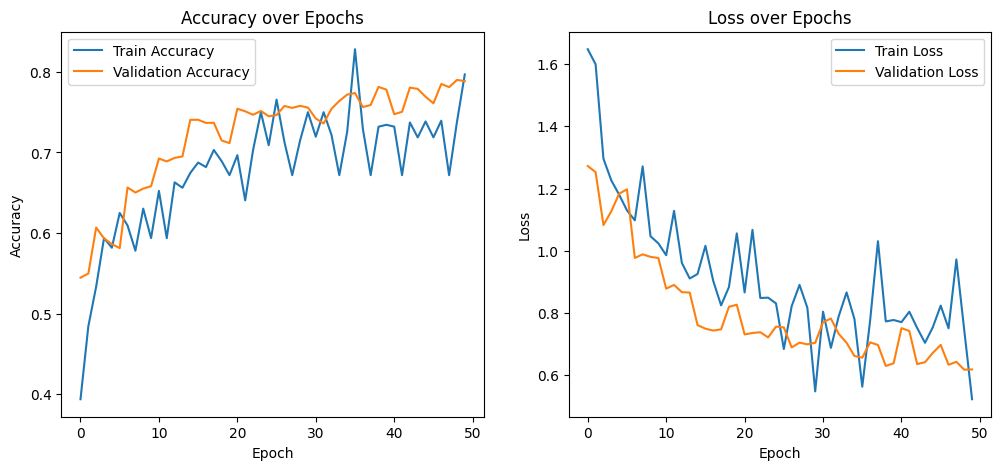

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, 10))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Visualize training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
